In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv('tips.csv')

In [90]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [91]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [92]:
df.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

In [93]:
df=df.drop(['Payer Name','CC Number','Payment ID'],axis=1)

In [94]:
odf=df.select_dtypes(include='object')
dodf=pd.get_dummies(odf)
dodf

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,True,False,True,False,False,False,True,False,True,False
1,False,True,True,False,False,False,True,False,True,False
2,False,True,True,False,False,False,True,False,True,False
3,False,True,True,False,False,False,True,False,True,False
4,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
239,False,True,True,False,False,True,False,False,True,False
240,True,False,False,True,False,True,False,False,True,False
241,False,True,False,True,False,True,False,False,True,False
242,False,True,True,False,False,True,False,False,True,False


In [95]:
nodf=df.select_dtypes(exclude='object')
nodf

,total_bill,tip,size,price_per_person
0,16.99,1.01,2,8.49
1,10.34,1.66,3,3.45
2,21.01,3.50,3,7.00
3,23.68,3.31,2,11.84
4,24.59,3.61,4,6.15
...,...,...,...,...
239,29.03,5.92,3,9.68
240,27.18,2.00,2,13.59
241,22.67,2.00,2,11.34
242,17.82,1.75,2,8.91


In [96]:
df1=pd.concat([dodf,nodf],axis=1)

In [97]:
df1

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,total_bill,tip,size,price_per_person
0,True,False,True,False,False,False,True,False,True,False,16.99,1.01,2,8.49
1,False,True,True,False,False,False,True,False,True,False,10.34,1.66,3,3.45
2,False,True,True,False,False,False,True,False,True,False,21.01,3.50,3,7.00
3,False,True,True,False,False,False,True,False,True,False,23.68,3.31,2,11.84
4,True,False,True,False,False,False,True,False,True,False,24.59,3.61,4,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,False,True,True,False,False,True,False,False,True,False,29.03,5.92,3,9.68
240,True,False,False,True,False,True,False,False,True,False,27.18,2.00,2,13.59
241,False,True,False,True,False,True,False,False,True,False,22.67,2.00,2,11.34
242,False,True,True,False,False,True,False,False,True,False,17.82,1.75,2,8.91


In [98]:
q3,q1=np.percentile(df1,[25,75])
iqr=q3-q1
iqr

-2.0

In [99]:
ul=q3-(1.5*iqr)
ul

3.0

In [100]:
ll=q1-(1.5*iqr)
ll

5.0

In [101]:
df1

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,total_bill,tip,size,price_per_person
0,True,False,True,False,False,False,True,False,True,False,16.99,1.01,2,8.49
1,False,True,True,False,False,False,True,False,True,False,10.34,1.66,3,3.45
2,False,True,True,False,False,False,True,False,True,False,21.01,3.50,3,7.00
3,False,True,True,False,False,False,True,False,True,False,23.68,3.31,2,11.84
4,True,False,True,False,False,False,True,False,True,False,24.59,3.61,4,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,False,True,True,False,False,True,False,False,True,False,29.03,5.92,3,9.68
240,True,False,False,True,False,True,False,False,True,False,27.18,2.00,2,13.59
241,False,True,False,True,False,True,False,False,True,False,22.67,2.00,2,11.34
242,False,True,True,False,False,True,False,False,True,False,17.82,1.75,2,8.91


<Axes: >

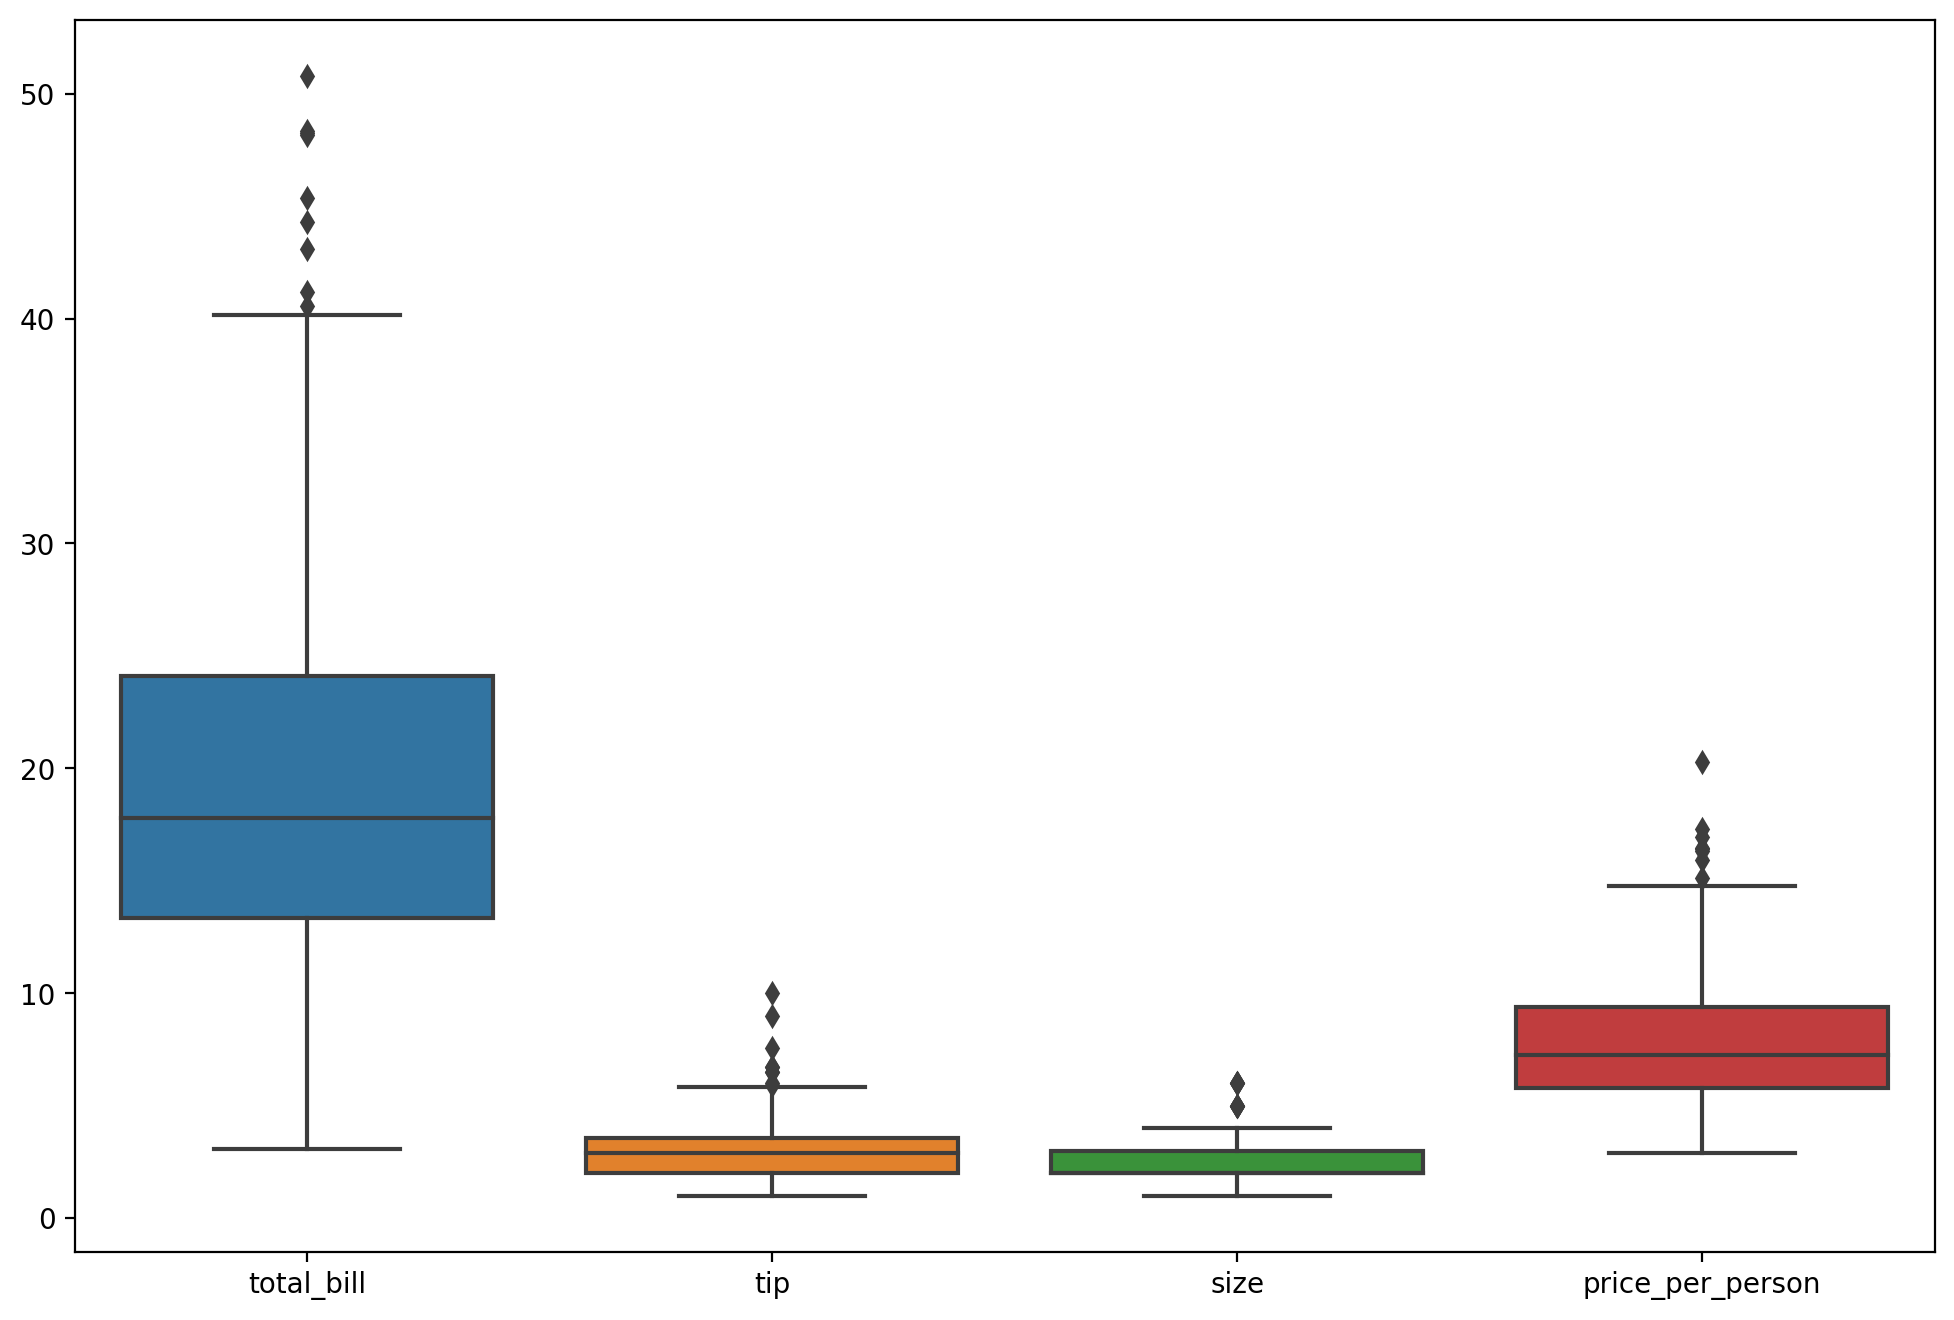

In [102]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df)

In [103]:
df1.to_csv('Cleanedtip.csv')

In [104]:
ndf=pd.read_csv('Cleanedtip.csv')

In [105]:
ndf=ndf.set_index('Unnamed: 0')

In [106]:
ndf

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,total_bill,tip,size,price_per_person
Unnamed: 0,,,,,,,,,,,,,,
0,True,False,True,False,False,False,True,False,True,False,16.99,1.01,2,8.49
1,False,True,True,False,False,False,True,False,True,False,10.34,1.66,3,3.45
2,False,True,True,False,False,False,True,False,True,False,21.01,3.50,3,7.00
3,False,True,True,False,False,False,True,False,True,False,23.68,3.31,2,11.84
4,True,False,True,False,False,False,True,False,True,False,24.59,3.61,4,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,False,True,True,False,False,True,False,False,True,False,29.03,5.92,3,9.68
240,True,False,False,True,False,True,False,False,True,False,27.18,2.00,2,13.59
241,False,True,False,True,False,True,False,False,True,False,22.67,2.00,2,11.34


In [107]:
ndf.corr()['tip'].sort_values()

time_Lunch         -0.121629
day_Thur           -0.095879
sex_Female         -0.088862
day_Fri            -0.055463
smoker_No          -0.005929
day_Sat            -0.002790
smoker_Yes          0.005929
sex_Male            0.088862
time_Dinner         0.121629
day_Sun             0.125114
price_per_person    0.347405
size                0.489299
total_bill          0.675734
tip                 1.000000
Name: tip, dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [109]:
x=ndf.drop('tip',axis=1)
y=ndf['tip']

In [110]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [111]:
sc=StandardScaler()
X_train=sc.fit_transform(X_l_train)
X_test=sc.transform(X_l_test)

In [112]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_l_train,y_l_train)
linear_model_pred=linear_model.predict(X_l_test)

In [113]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_l_test,linear_model_pred))
rmse

0.9652362711575881

Text(0.5, 1.0, 'TEST RESIDUALS')

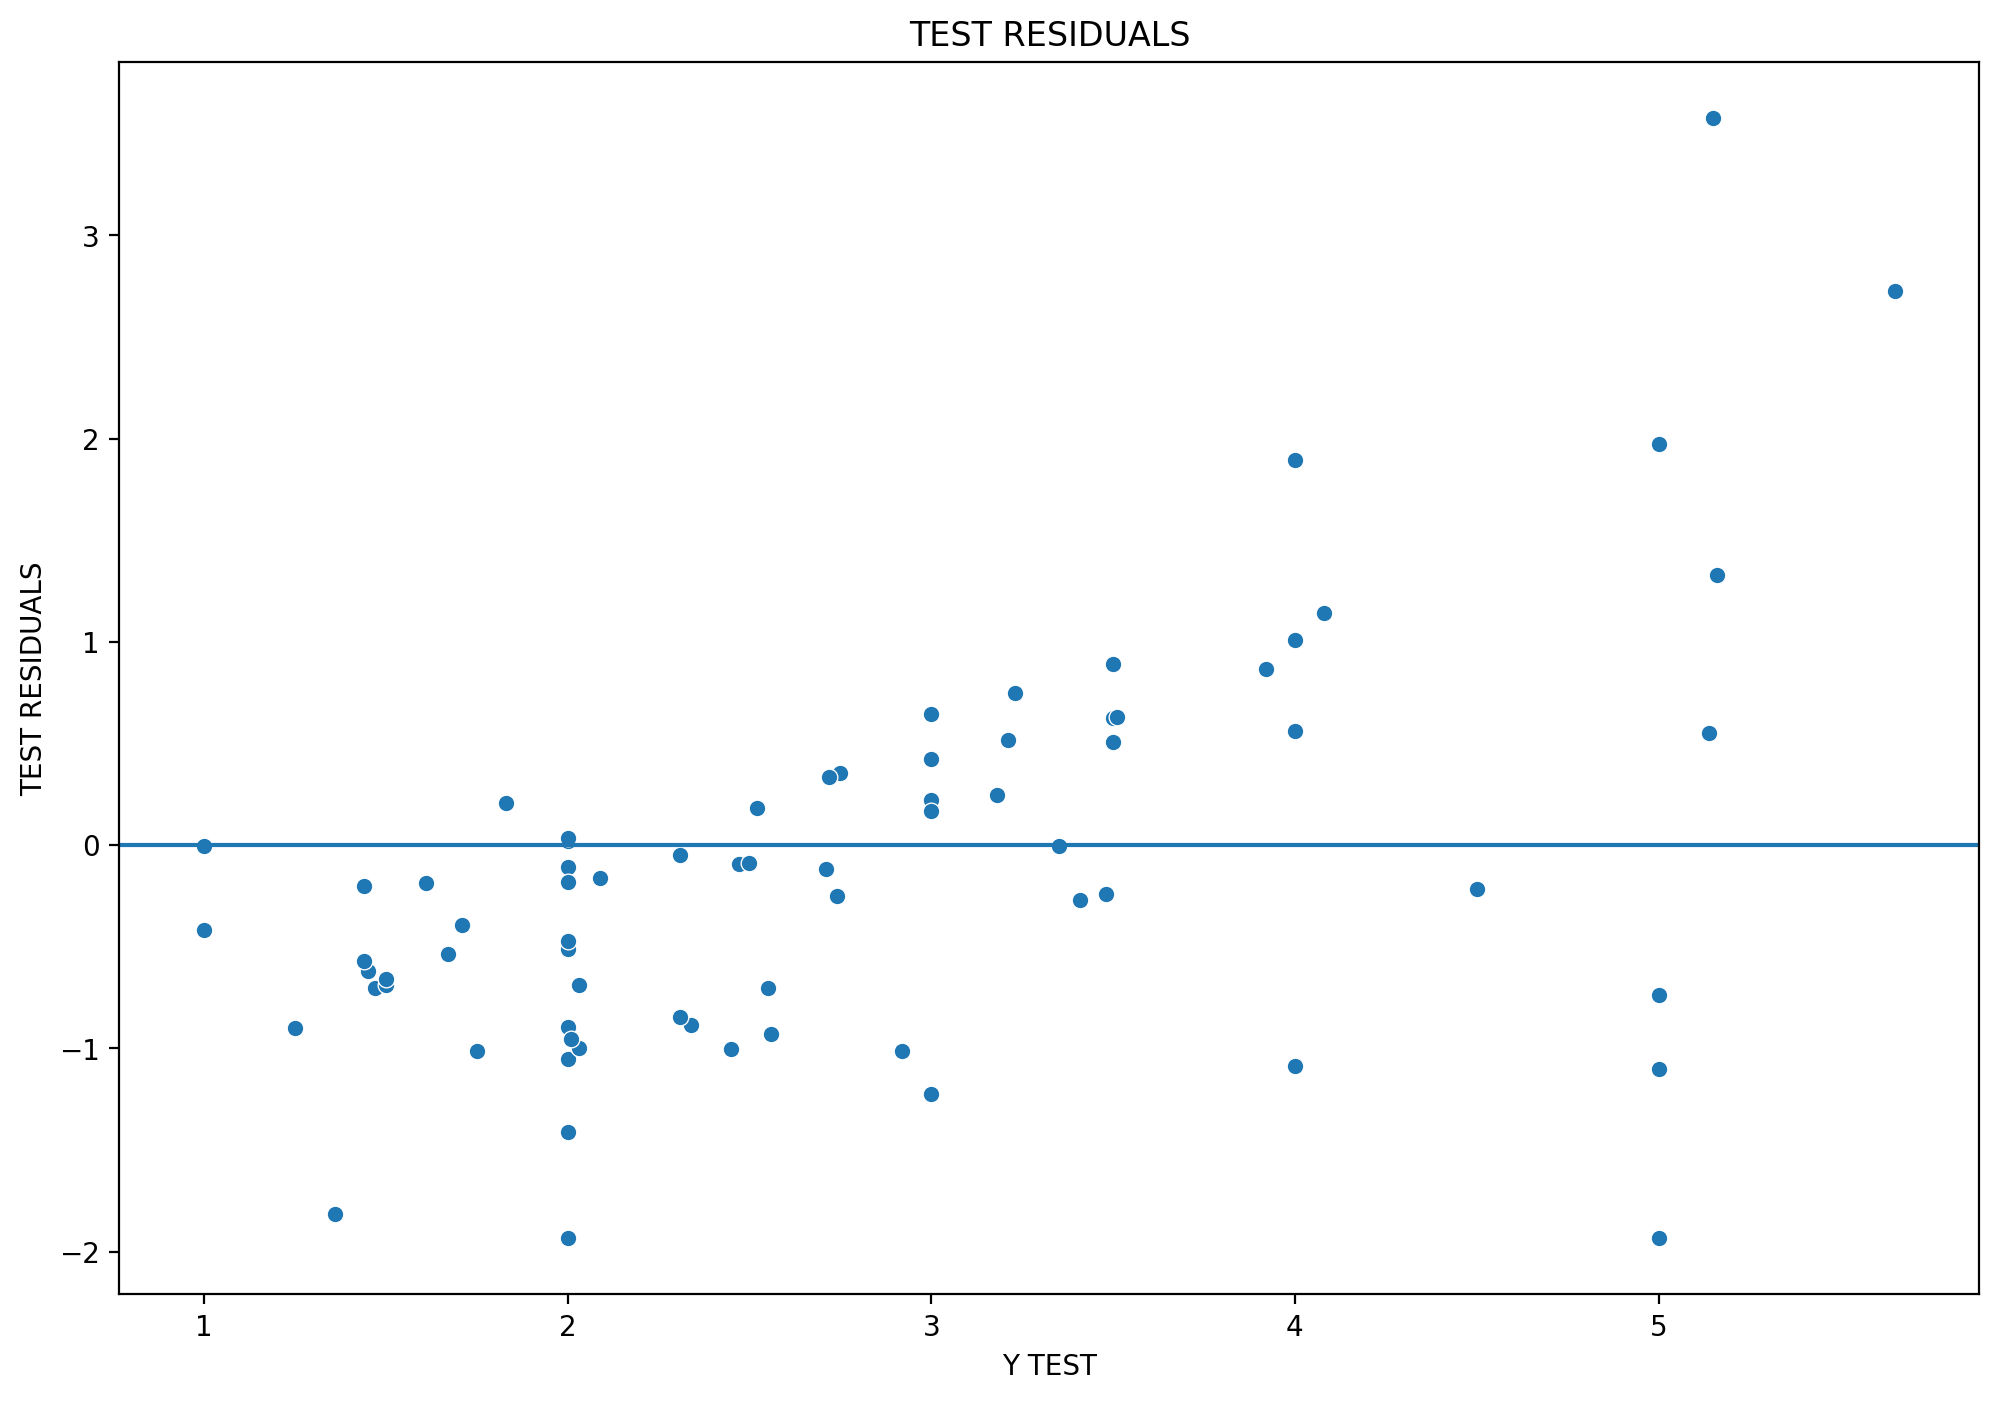

In [ ]:
test_residuals=y_l_ test-linear_model_pred
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x=y_l_test,y=test_residuals)
plt.axhline(y=0)
plt.xlabel('Y TEST')
plt.ylabel('TEST RESIDUALS')
plt.title('TEST RESIDUALS')

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
train_rmse_error=[]
test_rmse_error=[]
for d in range(1,10):
    pf=PolynomialFeatures(degree=d,include_bias=False,interaction_only=True)
    poly_x_conv=pf.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(poly_x_conv, y, test_size=0.3, random_state=42)
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    linear_model=LinearRegression()
    linear_model.fit(X_train,y_train)
    linear_model_xpred=linear_model.predict(X_train)
    linear_model_pred=linear_model.predict(X_test)
    rmse_train=np.sqrt(mean_squared_error(y_train,linear_model_xpred))
    rmse_test=np.sqrt(mean_squared_error(y_test,linear_model_pred))
    train_rmse_error.append(rmse_train)
    test_rmse_error.append(rmse_test)

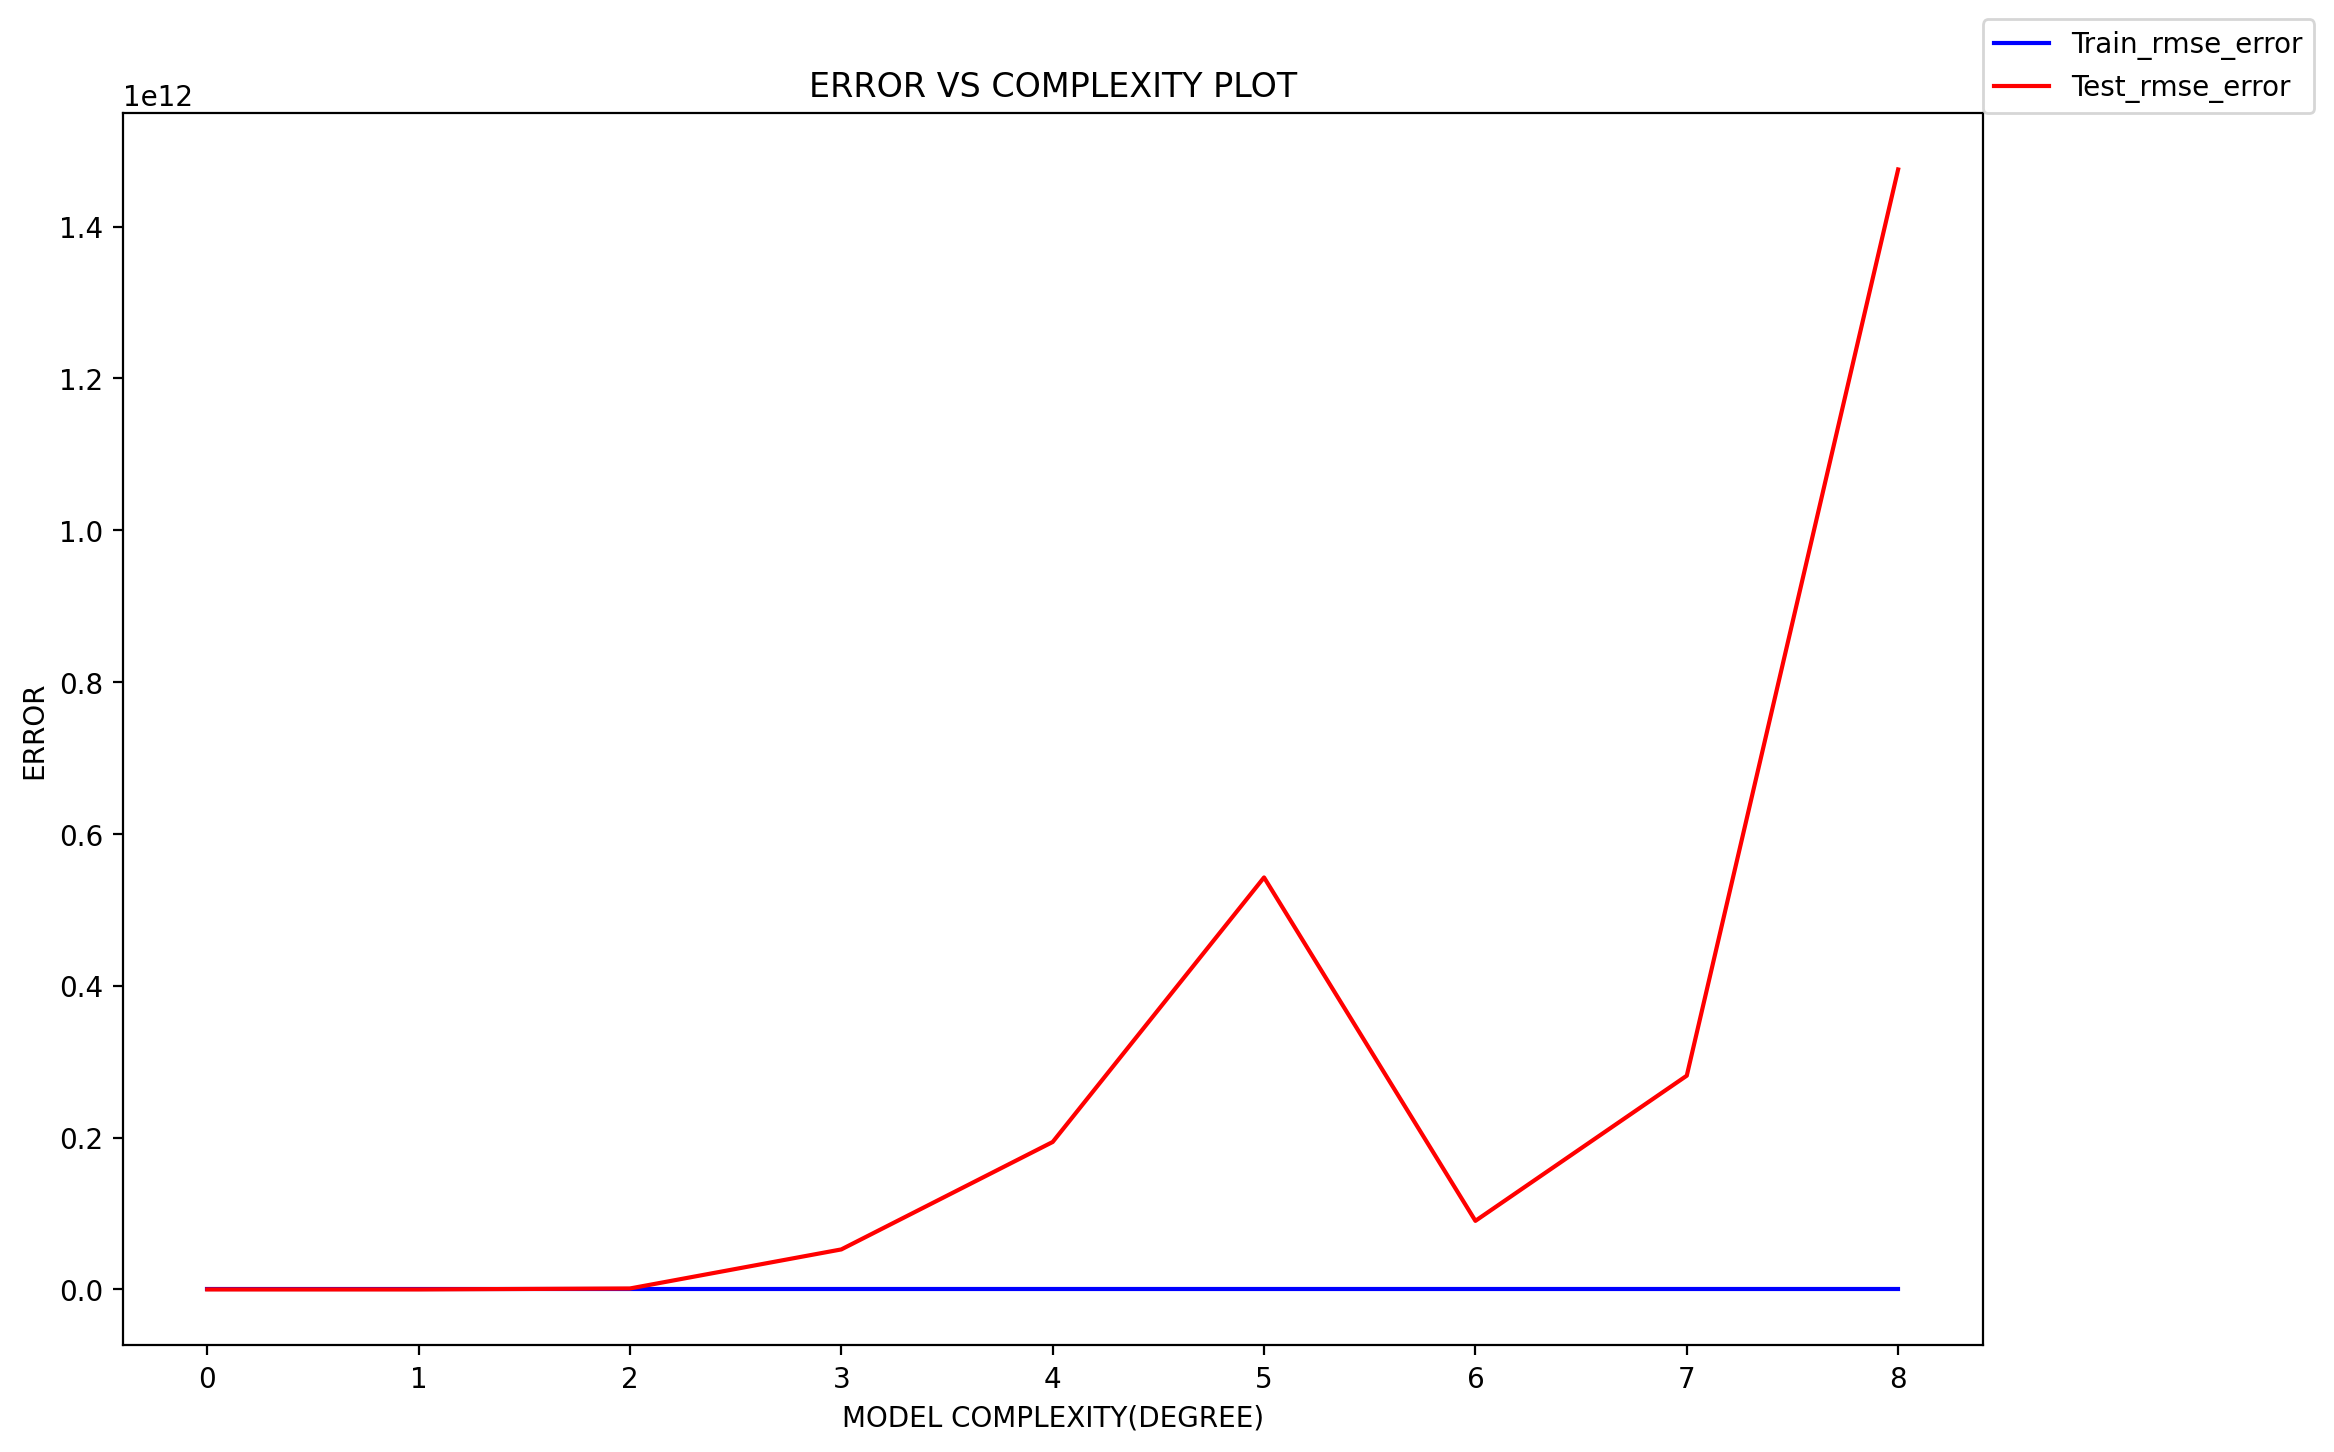

In [117]:
plt.figure(figsize=(12,8),dpi=200)
plt.plot(train_rmse_error,color='Blue',label='Train_rmse_error')
plt.plot(test_rmse_error,color='Red',label='Test_rmse_error')
plt.xlabel('MODEL COMPLEXITY(DEGREE)')
plt.ylabel('ERROR')
plt.title('ERROR VS COMPLEXITY PLOT')
plt.legend(loc=(1,1))
plt.show()

In [118]:
pf=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
poly_x_conv=pf.fit_transform(x)
X_dp_train, X_dp_test, y_dp_train, y_dp_test = train_test_split(poly_x_conv, y, test_size=0.3, random_state=42)
X_dp_train=sc.fit_transform(X_dp_train)
X_dp_test=sc.transform(X_dp_test)
linear_model=LinearRegression()
linear_model.fit(X_dp_train,y_dp_train)
poly_model_pred=linear_model.predict(X_dp_test)
rmse_poly=np.sqrt(mean_squared_error(y_dp_test,poly_model_pred))
rmse_poly

1.1656061171542085

In [119]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
enc=ElasticNetCV()
X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_g_train=sc.fit_transform(X_g_train)
x_g_test=sc.transform(X_g_test)
p_m={'l1_ratio':[.1,.2,.89,.45,.99,.98],'n_alphas':[1,10,100,100]}
gn=GridSearchCV(estimator=enc,param_grid=p_m,scoring='neg_mean_squared_error',cv=10,verbose=1)
gn.fit(x_g_train,y_g_train)
g_pred=gn.predict(x_g_test)
g_pred

Fitting 10 folds for each of 24 candidates, totalling 240 fits


array([2.96799178, 1.96373958, 3.93194455, 3.83975124, 2.13667117,
       2.56651894, 3.55656907, 2.3099584 , 2.50608379, 2.39337125,
       2.82282725, 2.15131705, 2.14481865, 2.25879951, 1.82037276,
       3.13794516, 2.95063745, 3.11971784, 2.63729431, 5.74366464,
       3.56412621, 3.31499774, 2.22396788, 2.04122388, 3.0836611 ,
       2.26525621, 2.09910003, 3.21390399, 3.20460773, 6.6076335 ,
       4.87988692, 1.65767675, 3.3308218 , 2.79019253, 2.94922891,
       3.90095891, 2.1176539 , 5.39801966, 2.3713218 , 3.00496445,
       2.12785457, 2.49404861, 3.33358735, 2.3500333 , 1.92321962,
       0.93756038, 1.88827396, 3.13812675, 1.89256377, 2.37782021,
       3.14934893, 3.49381849, 4.57806511, 2.65238711, 2.93111561,
       2.38617822, 1.60636213, 2.78751118, 3.00198625, 2.64719366,
       4.65573701, 2.7078041 , 3.05742618, 2.5046032 , 3.0049903 ,
       3.04066846, 2.31372374, 1.53497703, 3.63081294, 3.65713083,
       3.50059591, 4.31580084, 2.7706019 , 2.92606328])

In [120]:
gn.best_estimator_

ElasticNetCV(l1_ratio=0.45, n_alphas=10)

In [121]:
gn.best_score_

-1.202734866495703

In [122]:
gn.best_params_

{'l1_ratio': 0.45, 'n_alphas': 10}

In [123]:
gn.best_index_

13

In [124]:
X_fc_train, X_fc_test, y_fc_train, y_fc_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_fc_train=sc.fit_transform(X_fc_train)
x_fc_test=sc.transform(X_fc_test)
fenc=ElasticNetCV(l1_ratio=0.45,alphas=[10])
fenc.fit(x_fc_train,y_fc_train)

ElasticNetCV(alphas=[10], l1_ratio=0.45)

In [125]:
fenc_pred=fenc.predict(x_fc_test)

In [126]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_fc_test,fenc_pred))
rmse

1.186404238098806

In [127]:
final_model=LinearRegression()
final_model.fit(x,y)
final_model_pred=final_model.predict(x)

In [128]:
rmse=np.sqrt(mean_squared_error(y,final_model_pred))
rmse

1.0024301336709138

In [129]:
from joblib import dump,load

In [130]:
dump(final_model,'Final_tip_model')

['Final_tip_model']

In [131]:
loded_model=load('Final_tip_model')

In [132]:
loded_model.coef_

array([ 0.01239654, -0.01239654,  0.03771957, -0.03771957,  0.07482456,
       -0.06016116,  0.05319772, -0.06786112, -0.02420995,  0.02420995,
        0.12764312, -0.05690728, -0.08686802])

In [133]:
campaign=[[0,1,1,0,0,0,1,0,1,0,23.45,3,7.45]]

In [134]:
prdicted_tip=loded_model.predict(campaign)

c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [135]:
prdicted_tip

array([3.55546185])